<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Reg" data-toc-modified-id="Logistic-Reg-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Reg</a></span></li></ul></div>

In [ ]:
"For this project, we'll be exploring the data provided by our client, Northwind, containing companywide sales data for a range of products.  Our goal is to derive the significance of discounts on overall sales as well as to provide the client with additional business recommendations based on the results of EDA. \n",
    "\n",
    "To complete our analysis, we will follow the OSEMN Data Science process as outlined [here](http://www.dataists.com/tag/osemn/).\n",
    "\n",
    "1. Obtain Data\n",
    "    - Load dataset provided by client\n",
    "2. Pre-Process/Scrub Data\n",
    "    - Ensure that missing values are handled appropriately\n",
    "    - Ensure that all data is cast to the correct dtype, and that any non-sensical datapoints are scrubbed or dropped from our dataset.\n",
    "3. Explore Data\n",
    "    - Cluster, visualize, and view correlations between features in the dataset \n",
    "    - Identify the aims of the project in the form of clearly articulated business questions\n",
    "4. Hypothesis Testing\n",
    "    - Utilize hypothesis testing to evaluate the results questions posed in the data exploration phase.\n",
    "    - Utilize various statistical methodologies to evaluate significace of results\n",
    "5. Interpret, Review Results\n",
    "    - Using the results of hypothesis/significance testing, evaluate the business questions posed in Step 3\n",
    "    - Articulate business recommendations based on the results of testing at appropriate confidence intervals\n",
    "    - Identify potential improvements or factors that may skew the obtained results \n",
    "    - Identify suggested next steps for client"

Logistic Regression
Matrix
Feature adjustments (need name) — Feature importance
Subspace sampling
Ensemble methods
Random forest method
GridsearchCV (combinatorial, exhaustive)
- Parameter Tuning
- Grid Searching
Cross val score for random forest classifier
AdaBoost - tuning gradient boosted trees
Gradient Boosting
Weak vs Strong learners
XGBoost - extreme gradient boosting

the sklearn library provides an easy way tune model parameters through exhaustive search by using its gridseachcv package, which can be found inside the model_selection module. GridsearchCV combined K-Fold Cross Validation with a grid search of parameters. In order to do this, we must first create a Parameter Grid that tells sklearn which parameters to tune, and which values to try for each of those parameters. GridsearchCV Documentation

‘’’
clf = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(train_data, train_labels)

gs_tree.best_params_
‘’’

This code will run every combination the parameters above. It will start by creating by creating DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=1), training on the data with 3-fold cross validation, and recording the average score. Then, it will change 1 parameter, and repeat the process (e.g. DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=5), and so on), keeping track of the overall performance of each model. Once it has tried every combination, the GridSearchCV object we created will automatically default the model that had the best score. We can even access the best combination of parameters by checking the best_params_ attribute!



————


When creating your GridSearchCV object, pass in:
* our Random Forest Classifier
* The parameter grid for our Random Forest Classifier
* cv=3
* Do not pass in return_train_score as we did with our Decision Trees example above. In the interest of runtime, we'll only worry about testing accuracy this time.
NOTE: The runtime on the following cell will be over a minute on most computers.

————


For plotting importance of features of a model:

‘’’
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
‘’’



https://www.365chess.com/eco.php



create rating difference column!!!!!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [3]:
df = pd.read_csv("games.csv")
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [4]:
df.opening_name.unique()

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

In [5]:
df.shape

(20058, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [7]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [8]:
df['rating_difference'] = (df['white_rating'] - df['black_rating'])

In [9]:
df["first_move"] = df["moves"].apply(lambda x: x.split(" ")[0])

In [10]:
df.isnull().sum()

id                   0
rated                0
created_at           0
last_move_at         0
turns                0
victory_status       0
winner               0
increment_code       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_eco          0
opening_name         0
opening_ply          0
rating_difference    0
first_move           0
dtype: int64

In [11]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,rating_difference
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,7.799880
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,249.036667
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,-1605.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,-108.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,3.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,122.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,1499.000000


In [61]:
#df.hist()

In [ ]:
df.corr()

In [ ]:
df.head()

In [ ]:
df["first_move"] = df["moves"].apply(lambda x: x.split(" ")[0])

In [ ]:
df.head()

In [ ]:
df.increment_code.unique()

In [ ]:
df['player_time'] = df['increment_code'].apply(lambda x: x.split('+')[0])

In [ ]:
df['increment_secs'] = df['increment_code'].apply(lambda x: x.split('+')[1])
df.head(3)

In [ ]:
df.winner.value_counts()

In [ ]:
#df.opening_name.value_counts()

In [ ]:
#df['WinnerBool'] = df.winner.astype('bool')
#df.head(3)

Consolidate openings and re-run models, repeat for features, group openings that begin with the first move and make new column, how many attacking pieces aimed at center after 2 moves (consider 3)

In [13]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_difference', 'first_move'],
      dtype='object')

In [14]:
#sns.pairplot(data=df_unrated, x_vars=('turns', 'victory_status', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply', 'first_move', 'player_time', 'increment_secs'), y_vars='winner')

In [15]:
df.winner.unique()

array(['white', 'black', 'draw'], dtype=object)

In [16]:
df.winner.replace({'black': 0, 'white': 1, 'draw': 0.5}, inplace=True)
df.winner.unique()

array([1. , 0. , 0.5])

In [17]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_difference,first_move
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,1.0,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,d4
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,0.0,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,d4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,1.0,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4,e4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,1.0,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15,d4
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,1.0,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,e4


In [18]:
'''
def convert_winner(df):
    if df.winner == 'white':
        return 1
    elif df.winner == 'black':
        return 0
    else:
        return .5
    
df_new['winner_num'] = df_new.apply(convert_winner,axis=1)
df_new
'''

"\ndef convert_winner(df):\n    if df.winner == 'white':\n        return 1\n    elif df.winner == 'black':\n        return 0\n    else:\n        return .5\n    \ndf_new['winner_num'] = df_new.apply(convert_winner,axis=1)\ndf_new\n"

In [19]:
#df.loc[df['winner'] == 'white', winner] = 1
#df.loc[df['winner'] == 'black', winner] = 0
#df.loc[df['winner'] == 'draw', col] = .5

In [20]:
#x = {'white': 1, 'black': 0, 'draw': 0.5}

In [21]:
#df['winner_num'] = df.winner
#df.head(3)

In [22]:
#df['winner_num'] = df['winner_num'].map(x)
#df.head(3)

In [23]:
#df_unrated = df[(df.rated == False)]
#print(df_unrated.rated.value_counts())
#df_unrated.head()

In [24]:
#df_unrated.drop(['id', 'rated', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id'], axis=1, inplace=True)

In [25]:
#df_unrated.columns

In [26]:
#sns.catplot(data=df, x=('rated', 'turns', 'victory_status', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply', 'first_move', 'player_time', 'increment_secs'), y='winner_num')

In [27]:
# Idea: Show Heatmap for White winning and black winning separately to determine if effect is the same

In [28]:
#Evaluating multicollinearity
#corr = df_unrated.corr()
#fig = plt.figure(figsize=(17,10))
#sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
#                     .stack()
#                     .sort_values(ascending=False))
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', cbar=True)
#ax.set_title("Multicollinearity between Features of Chess Dataset")

In [29]:
# Creating engine and binding to target database:
engine = create_engine('sqlite://', echo=False)
Session = sessionmaker(bind=engine)
session = Session()

In [30]:
#pd.DataFrame.to_sql(df, con=engine, name='df')

In [31]:
#df_rated = pd.read_sql_query("""SELECT * FROM df \
#            WHERE rated = True;""", engine)
#df_rated.rated.value_counts()

In [32]:
#df_rated.drop(['rated', 'index'], axis=1, inplace=True)

In [33]:
#df_rated.columns

In [34]:
#Evaluating multicollinearity
#corr = df_rated.corr()
#fig = plt.figure(figsize=(17,10))
#sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
#                     .stack()
#                     .sort_values(ascending=False))
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', cbar=True)
#ax.set_title("Multicollinearity between Features of Chess Dataset for Rated Games")

In [35]:
#df_unrated.groupby(['winner']).count().plot(kind='barh', color='#E78AC3', legend=False)

In [36]:
#df_rated.groupby(['winner']).count().plot(kind='barh', color='#E78AC3', legend=False)

In [37]:
#df_unrated.winner.value_counts()

In [38]:
#df_rated_whitewin = pd.read_sql_query("""SELECT * FROM df \
#            WHERE rated = True \
#            AND winner = 'white'""", engine)
#df_rated_whitewin.drop(['rated', 'index', 'created_at', 'last_move_at', 'winner_num'], axis=1, inplace=True)
#df_rated_whitewin.head()

In [39]:
#df_rated_whitewin_corr = df_rated_whitewin.copy()
#df_rated_whitewin_corr.drop(['turns', 'id',], axis=1, inplace=True)
#df_rated_whitewin_corr.columns

In [40]:
#Evaluating multicollinearity
#corr = df_rated_whitewin_corr.corr()
#fig = plt.figure(figsize=(17,10))
#sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
#                     .stack()
#                     .sort_values(ascending=False))
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', cbar=True)
#ax.set_title("Multicollinearity between Features of Chess Dataset for Rated Games where White Wins")

In [41]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_difference,first_move
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,1.0,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,d4
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,0.0,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,d4


In [42]:
df.victory_status.replace({'mate': 0, 'resign': 1, 'outoftime': 2, 'draw': 4}, inplace=True)

In [43]:
df.winner.replace({'black': 0, 'white': 1, 'draw': 0.5}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [44]:
df.rated.replace({False: 0, True: 1}, inplace=True)

In [45]:
df.rated.unique()

array([0, 1])

In [46]:
# Drop unnecessary features from dataframe:
df.drop(['id', 'created_at', 'last_move_at', 'white_id', 'black_id'], axis=1, inplace=True)
df_target = df.winner
df.drop(['winner'], axis=1, inplace=True)

In [47]:
df_features = df

In [48]:
df_target.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: winner, dtype: float64

In [49]:
df_features.head()

,rated,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,rating_difference,first_move
0,0,13,2,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,d4
1,1,16,1,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,d4
2,1,61,0,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4,e4
3,1,61,0,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15,d4
4,1,95,0,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,e4


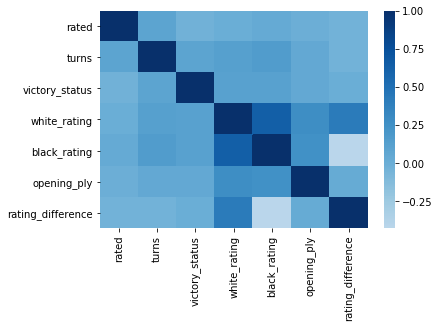

In [50]:
sns.heatmap(df_features.corr(), center=0, cmap='Blues')

In [51]:
df_feature_dums = pd.get_dummies(df_features)

In [52]:
sns.heatmap(df_features_dums.corr(), center=0, cmap='Blues')

NameError: name 'df_features_dums' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_dums, df_target, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])
        
pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

Most important features - norm, std, run decision tree for feature importance -- remove top feature and rerun (run multiple times)

- Logistic Regression 
- Matrix Feature adjustments (need name) 
- Feature importance 
- Subspace sampling 
- Ensemble methods 
- Random forest method 
- GridsearchCV (combinatorial, exhaustive)

- Parameter Tuning
- Grid Searching Cross val score for random forest classifier 
- AdaBoost - tuning gradient boosted trees 
- Gradient Boosting 
- Weak vs Strong learners 
- XGBoost - extreme gradient boosting

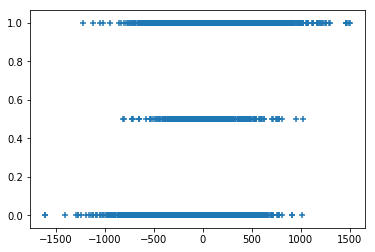

In [57]:
plt.scatter(df.rating_difference, df_target, marker='+')

## Logistic Reg

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm

In [59]:
for col in df.columns:
    df[col] = (df[col] - min(df[col])) / (max(df[col]) - min(df[col]))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [56]:
df.shape

(20058, 12)

In [58]:
train_test_split(df)
X_train, X_test, y_train, y_test = train_test_split(df, df_features, test_size=.2)

In [60]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')

model_log = logreg.fit(X_train, y_train)
model_log

ValueError: could not convert string to float: 'e4'